In [2]:
from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

In [3]:
DATA_STORE = '../data/assets.h5'

In [16]:
with pd.HDFStore(DATA_STORE) as store:
    sp500 = store['sp500/stooq'].loc['2009': '2016', 'close']

In [17]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [18]:
state_means, _ = kf.filter(sp500)

In [19]:
sp500.to_frame('close')

,close
Date,
2009-01-02,931.80
2009-01-05,927.45
2009-01-06,934.70
2009-01-07,906.65
2009-01-08,909.73
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


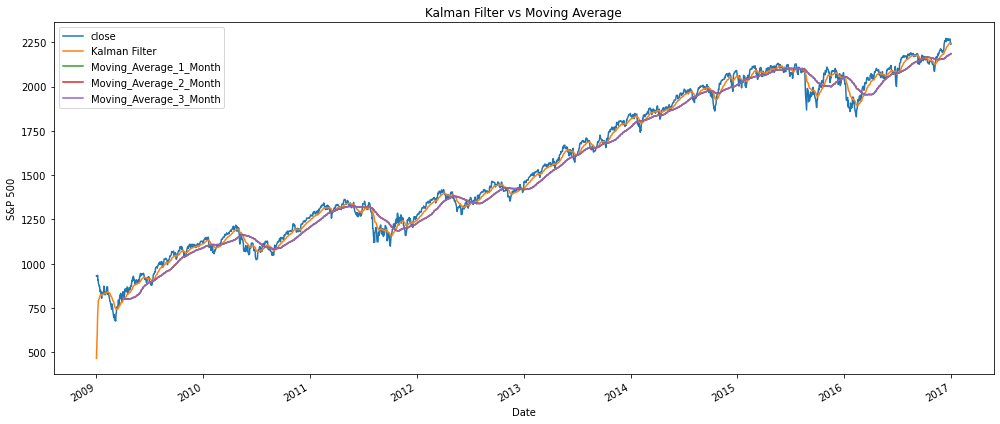

In [21]:
sp500_smoothed = sp500.to_frame('close')
sp500_smoothed['Kalman Filter'] = state_means
for month in [1,2,3]:
    sp500_smoothed["Moving_Average_{}_Month".format(month)] = sp500.rolling(months*21).mean()

ax = sp500_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6))
ax.set_xlabel('Date')
ax.set_ylabel('S&P 500')
plt.tight_layout()